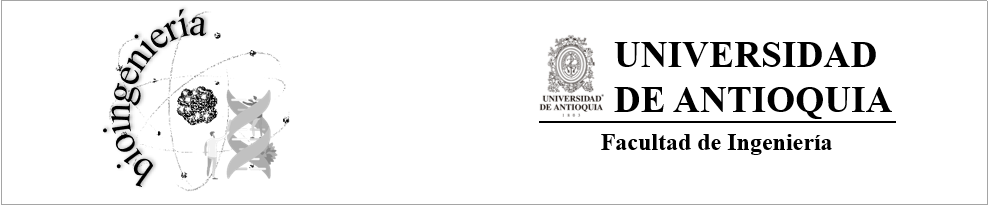

# Introducción al Deep Learning

### Introducción a las Redes Neuronales Artificiales

Las Redes Neuronales Artificiales (RNAs) o conocidas en inglés como Artificial Neural Networks (ANNs)  son un tipo de algoritmos bioinspirados capaces de abordar muchos problemas diferentes en el campo del aprendizaje automático. Las RNAs intentan emular el comportamiento y las capacidades de aprendizaje de las redes neuronales biológicas, por lo que se construyen siguiendo una estructura basada en la combinación de muchas unidades básicas (neuronas) llamadas <b>perceptrones</b>.

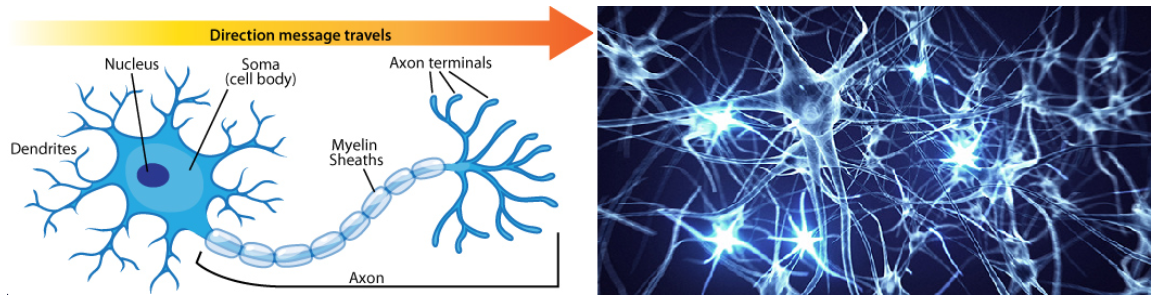

Al igual que las neuronas biológicas, los perceptrones están diseñados para tener dos salidas diferentes 1 o 0 (salida / no salida).

# El perceptrón

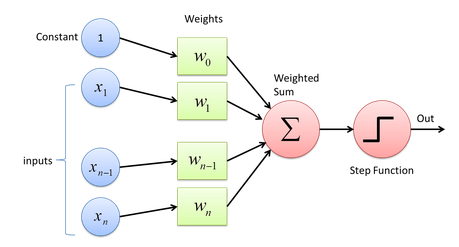

Donde $x_i$ corresponde a una entrada variable. El conjunto de entradas variables es expresado normalmente como un vector ${\bf{X}}=\{x_1,x_2,\cdots,x_n\}$.

Cada $w_i$ es una constante real (número real) por un peso ($weight$) que determina la contribución de la entrada $x_i$ a la salida del perceptrón.

La salida del perceptrón puede ser expresada como:

## $O(x_1,x_2,...,x_n) = \left\{ \begin{array}{ll} 1\;\;\;{\rm{if}}\;\;\;w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n > 0\\ 0\;\;{\rm{\text{other wise}}} \end{array} \right. $

Tenga en cuenta que el parámetro desconocido $w_0$ es el umbral que la combinación $w_1x_1 + w_2x_2 + \ ...\ + w_n x_n \;$ y que debe sobrepasar para obtener una salida igual a 1.

Suponiendo una entrada adicional $x_0 = 1$, y usando la función de signo ($sgn$), el perceptrón puede expresarse alternativamente como:<br>





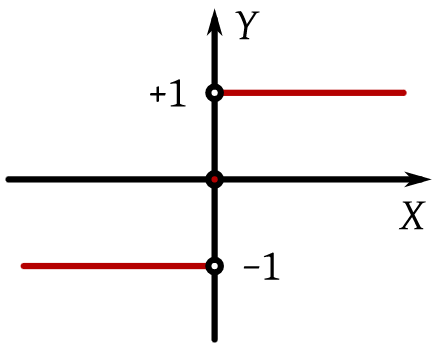

## $O(\textbf{x}) = sgn( \sum_{i=0}^{d}w_{i}x_{i}) = sgn(\textbf{W}^T\textbf{X})$

    
donde el vector
## $\textbf{W} = \{w_0, w_1, w_2, \cdots + w_n \}$

## Afinando el algoritmo

La función de signo debe ser reemplazada porque no es diferenciable. Una opción es utilizar la función $sigmoidea$ o $logística$.
<br>

## $g(u) = \frac{exp(u)}{1 - exp(u)}$


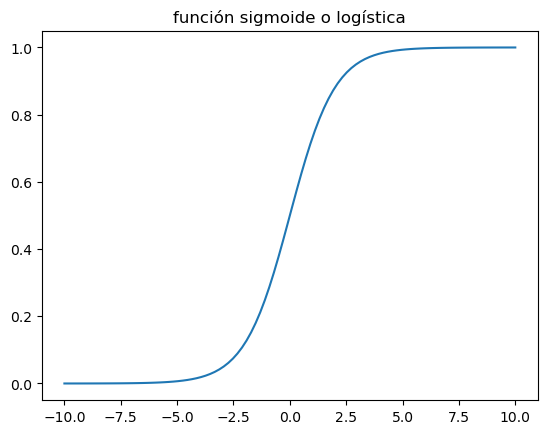

In [1]:
import numpy as np
import matplotlib.pyplot as plt
u=np.linspace(-10,10,100)
g = np.exp(u)/(1 + np.exp(u))
plt.title('función sigmoide o logística')
plt.plot(u,g)
plt.show()

## Funciones de activación


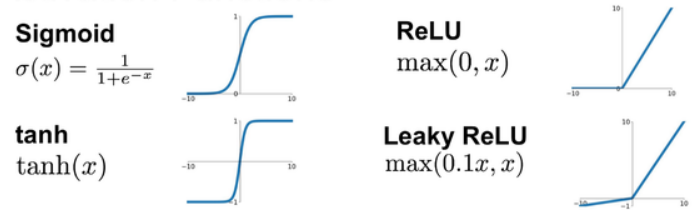

Existen mas funciones de activación además de estas

## Perceptrón multicapas - Multi-Layer Perceptron (MLP)

Para resolver problemas más complejos, se pueden usar varios perceptrones juntos formando lo que se llama un perceptrón multicapa.

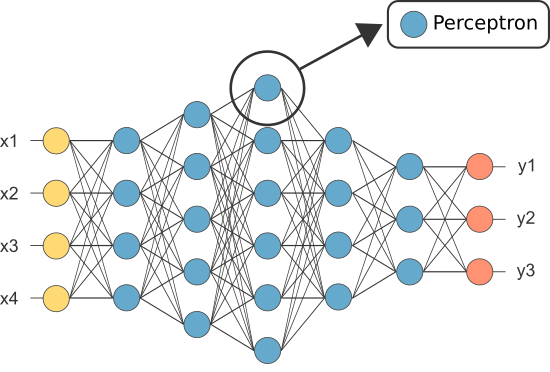

Cuando se tienen varias capas del MLP, por ejemplo, una capa oculta y otra a la salida, se contará con dos funciones de activación, una para cada capa. Cada capa oculta tiene una función de activación que pueden ser iguales o diferentes entre sí.

## Algoritmo de retropropagación - (Backpropagation)


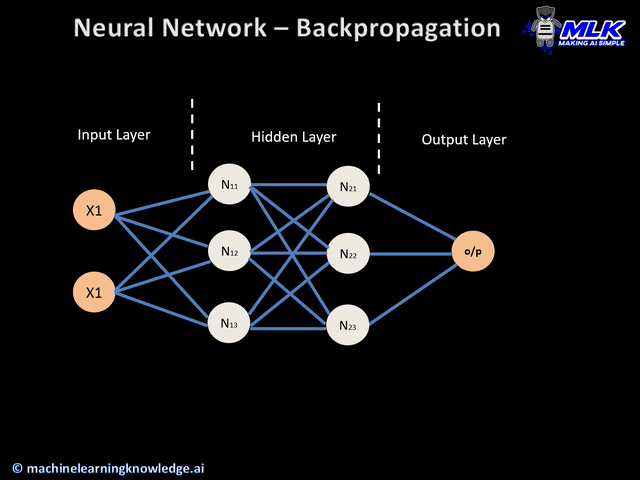

Cuando el valor de perdida (loss) es muy alto, entonces se ajustan los pesos w de manera que a la salida se tenga una menor perdida (loss). Es decir, el agoritmo se devuelve a ajustar esos parametros w.

Se devuelve las veces necesarias para que el algortimo pueda aprender, y esto se da por épocas.

## Batch y Minibatch

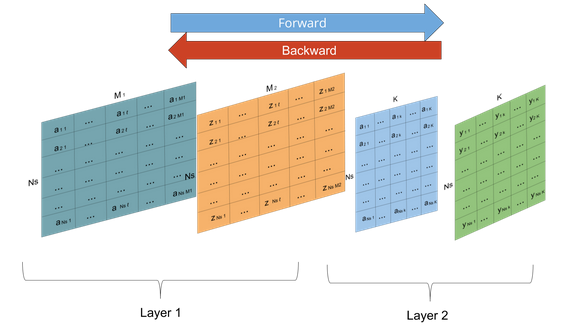

El entrenamiento que acumula los errores de todas las muestras de entrenamiento antes de realizar la actualización de los pesos de la red se denomina <b>Batch train</b>.

Desafortunadamente, si la cantidad de muestras de entrenamiento es muy grande, la ejecución de cada iteración se vuelve intratable, porque tanto la cantidad de cálculos (tiempo de CPU) como la cantidad de memoria (RAM) requerida para realizar multiplicaciones de matrices y para guardar resultados parciales. Pero la verdadera desventaja es la trayectoria del gradiente por lotes que lo lleva a un mal lugar (punto de silla).

Debido al costo alto que puede tener la ejecución del algoritmo, una solución intermedia, denominada <b>minibatch</b>, divide las muestras de entrenamiento en mini lotes (<b>minibatch</b>) y ejecuta y actualiza los pesos (pasos hacia adelante y hacia atrás) por mini lote.

# Práctica

### Clasificación Fashion-MNIST

Crearemos un modelo de clasificación para el conjunto de datos <a href="https://github.com/zalandoresearch/fashion-mnist" target="_blank">Fashion-MNIST dataset</a>. MNIST es una base de datos bastante sencilla, ya que con las redes neuronales puede lograr fácilmente una precisión superior al 97%. Fashion-MNIST es un conjunto de imágenes de ropa en escala de grises de 28x28. Es más complejo que MNIST, por lo que es una mejor representación del rendimiento real de su red.

#### Se importan las librerías de interés

In [2]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

#### Descargamos la base de datos desde keras

In [ ]:
!pip install keras

In [ ]:
!pip install keras.datasets

In [ ]:
!pip install tensorflow

In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Veamos un ejemplo de las imágenes que vamos a trabajar

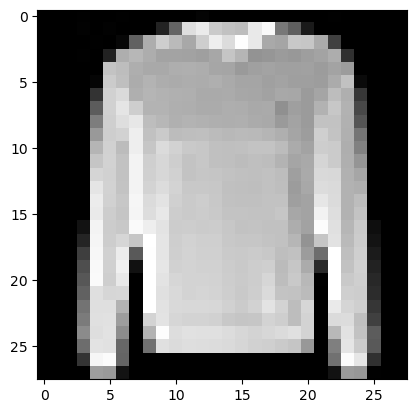

In [8]:
ind = np.random.permutation(X_train.shape[0])
plt.imshow(x_train[ind[0],:,:], cmap='gray');

In [ ]:
!pip install np_utils

In [9]:
import tensorflow as tf

In [10]:
#from keras.utils. import np_utils
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1] #Datos de entrada a la RNA

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# Se convierte la lista de etiquetas a una matriz de clase binaria
y_trainOHE = tf.keras.utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

El método $StandardScale()$ usa el médoto de escalamiento $z-score$

# $z = \frac{X - \bar{X}}{\sigma}$

Donde;

$X$ : es la muestra

$\bar{X}$ : es la media de las muestras

$\sigma$ : es la desviación estándar

In [11]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [12]:
X_trainN[0]

array([-8.64371176e-03, -2.32233257e-02, -3.91780598e-02, -4.13217164e-02,
       -5.76457447e-02, -7.11673332e-02, -9.88784561e-02, -1.56652590e-01,
       -2.39080340e-01, -3.77827057e-01, -5.70545271e-01, -6.94039140e-01,
       -7.58868529e-01, -7.48857821e-01, -7.49009030e-01, -7.75175617e-01,
       -7.57573332e-01, -6.46914032e-01, -5.04399791e-01, -3.19932035e-01,
       -2.03351232e-01, -1.40220976e-01, -1.09811552e-01, -9.22242465e-02,
       -6.82766692e-02, -5.05167826e-02, -3.32743014e-02, -1.36223522e-02,
       -1.25721114e-02, -1.78614038e-02, -3.30493250e-02, -5.59065175e-02,
       -7.80937469e-02, -1.31089676e-01, -2.43799305e-01, -3.63949871e-01,
       -4.88007101e-01, -6.43607971e-01, -8.34050515e-01, -1.00280952e+00,
       -1.09141822e+00, -1.08265217e+00, -1.06645189e+00, -1.10652482e+00,
       -1.08951320e+00, -9.40120261e-01, -7.80195032e-01, -5.94466180e-01,
       -4.41415891e-01, -3.16307390e-01, -2.07437016e-01, -1.48946980e-01,
       -1.18545275e-01, -

In [13]:
print("Número de clase:", nb_classes)

Número de clase: 10


In [14]:
print("Ejemplo de la salida: ")
y_trainOHE[0]

Ejemplo de la salida: 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [15]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [16]:
y_trainOHE[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
print("Tamaño de las imágenes (28x28) según la descripción del dataset: ",28*28)
print("La dimensión de la entrada (x) a la red: ", input_dim)

Tamaño de las imágenes (28x28) según la descripción del dataset:  784
La dimensión de la entrada (x) a la red:  784


## Codificación de variables categóricas

#### 1. Se hace codificación One-Hot-Encoding (OHE) de la salida

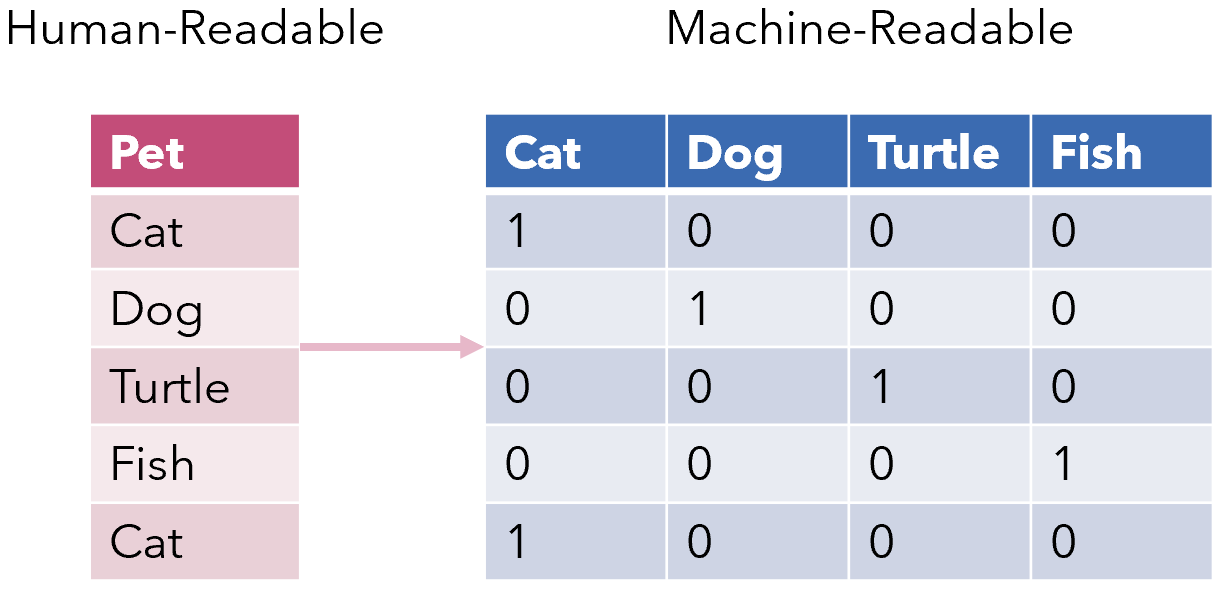



### hay más opciones de codificación
#### 2. Codificación Entera

A cada variable categória se le asigna un número entero. Por ejemplo, “red” es 1, “green” es 2, y “blue” es 3.

<a href="https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/" target="_blank">más...</a>

In [18]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [19]:
y_trainOHE[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

## Definir la arquitectura de la red

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(input_dim,)),
    Activation('tanh'),
    Dense(nb_classes),
    Activation('softmax'),
])

2025-05-20 13:40:07.305599: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-05-20 13:40:07.305708: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-20 13:40:07.305724: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-20 13:40:07.305975: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-20 13:40:07.306001: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


La funcion de activacion softmax me dice si cada neurona a la salida es 1 o 0 para esta condificacion One Hot

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

o

In [22]:
del model # se borra la variable model
model = Sequential()
model.add(Dense(64, input_dim=input_dim))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dense(nb_classes, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

Una vez la arquitectura del modelo sea definida, el siguiente paso es configurar la función de pérdida y el optimizador

<a href="https://keras.io/api/optimizers/" target="_blank">Keras optimizers</a>
<br><br>
<a href="https://keras.io/api/losses/" target="_blank">Loss functions</a>
<br><br>
<a href="https://youtu.be/A6FiCDoz8_4" target="_blank">Video</a>

In [ ]:
!pip install tf_keras

In [24]:
TF_USE_LEGACY_KERAS=True
# pass optimizer by name: default parameters will be used
model.compile(loss='categorical_crossentropy', optimizer='sgd')

# or instantiate an optimizer before passing it to model.compile
sgd = tf.keras.optimizers.SGD( decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

#### Entrenamiento

In [25]:
print("Training...")
model.train_on_batch(X_trainN, y_trainOHE)

print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)

Training...


2025-05-20 13:44:56.094265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Generating test predictions...


real class
9


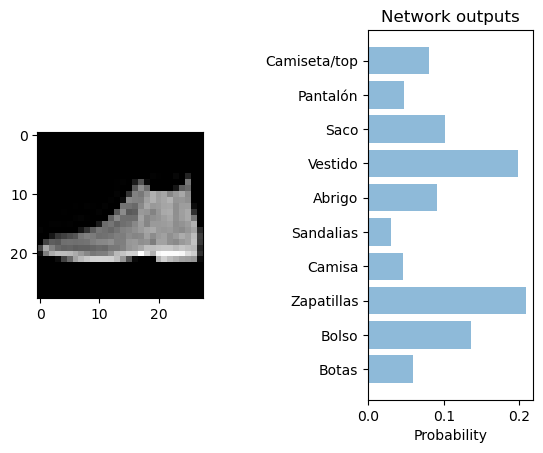

In [26]:
print('real class')
print(y_test[0])

objects = ('Botas', 'Bolso', 'Zapatillas', 'Camisa', 'Sandalias', 'Abrigo', 'Vestido', 'Saco', 'Pantalón', 'Camiseta/top')
y_pos = np.arange(nb_classes)
performance = preds.flatten()
plt.subplot(121)
plt.imshow(X_test[0,:].reshape(28,28), cmap='gray');
plt.subplot(122)
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
plt.subplots_adjust(wspace = 1)
plt.show()

In [27]:
print("Training...")
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Training...
Epoch 1/10
3375/3375 - 30s - 9ms/step - loss: 0.4662 - val_loss: 0.3929
Epoch 2/10
3375/3375 - 28s - 8ms/step - loss: 0.3675 - val_loss: 0.3747
Epoch 3/10
3375/3375 - 27s - 8ms/step - loss: 0.3387 - val_loss: 0.3667
Epoch 4/10
3375/3375 - 27s - 8ms/step - loss: 0.3183 - val_loss: 0.3602
Epoch 5/10
3375/3375 - 28s - 8ms/step - loss: 0.3017 - val_loss: 0.3484
Epoch 6/10
3375/3375 - 28s - 8ms/step - loss: 0.2903 - val_loss: 0.3633
Epoch 7/10
3375/3375 - 28s - 8ms/step - loss: 0.2802 - val_loss: 0.3580
Epoch 8/10
3375/3375 - 29s - 9ms/step - loss: 0.2703 - val_loss: 0.3543
Epoch 9/10
3375/3375 - 27s - 8ms/step - loss: 0.2600 - val_loss: 0.3614
Epoch 10/10
3375/3375 - 28s - 8ms/step - loss: 0.2526 - val_loss: 0.3571


Generating test predictions...


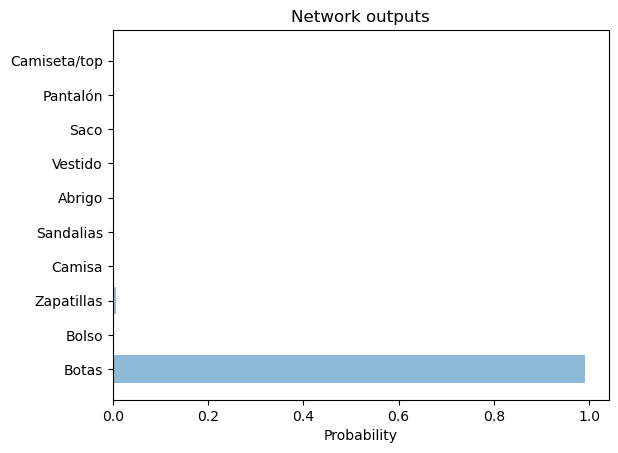

In [28]:
print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)
performance = preds.flatten()

plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')

plt.show()

In [29]:
preds = model.predict(X_testN, verbose=0)
classes_x=np.argmax(preds,axis=1)
classes_x

array([9, 2, 1, ..., 8, 1, 5])

In [30]:
preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  86.91 %


([<matplotlib.axis.YTick at 0x34ee19d00>,
 [Text(0, 0, 'Botas'),
  Text(0, 1, 'Bolso'),
  Text(0, 2, 'Zapatillas'),
  Text(0, 3, 'Camisa'),
  Text(0, 4, 'Sandalias'),
  Text(0, 5, 'Abrigo'),
  Text(0, 6, 'Vestido'),
  Text(0, 7, 'Saco'),
  Text(0, 8, 'Pantalón'),
  Text(0, 9, 'Camiseta/top')])

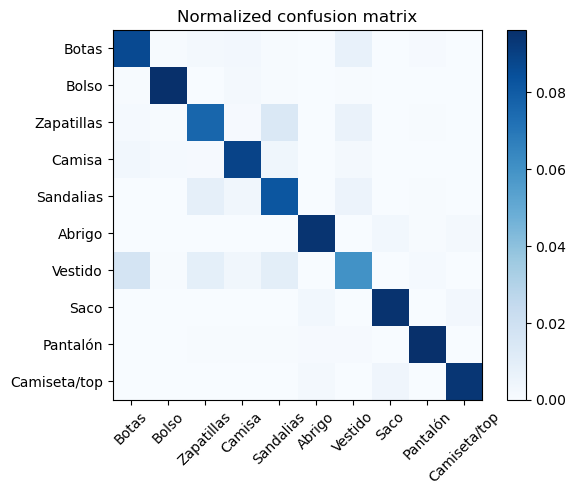

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
cm = cm/np.sum(cm)
cmap = plt.cm.Blues
tick_marks = np.arange(nb_classes)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects)

### Modelos funcionales

La API funcional de Keras proporciona una forma más flexible de definir modelos.

Los modelos se definen creando instancias de capas y conectándolos directamente entre sí en pares, luego definiendo un Modelo que especifica las capas para actuar como entrada y salida del modelo.

In [32]:
from keras.layers import Input, Dense
from keras.models import Model

# Esto retorna un tensor
inputs = Input(shape=(784,))

# Se llama a una capa con su entrada (tipo tensor), y retorna igualmente un tensor
x = Dense(64, activation='tanh')(inputs)
x = Dense(32, activation='tanh')(x)
predictions = Dense(nb_classes, activation='softmax')(x)

# Aquí se crea el modelo que incluye las capas definidas
# La capa de entrada y tres capas densas
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

Se entrena el modelo con los mismo parámetros del entrenamiento anterior.

In [ ]:
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
3375/3375 - 32s - 9ms/step - accuracy: 0.8182 - loss: 0.5545 - val_accuracy: 0.8482 - val_loss: 0.4261
Epoch 2/10


In [ ]:
preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

In [ ]:
preds[0]